In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import IPython.display as ipd

import numpy as np
import numpy.linalg as la
import numpy.random as rand
import math as m

In [341]:
import sys
sys.path.append("C:/AFIT/Courses/Optimization/CostFuncs/ctf")
from ctf.functionsnd import Perm

In [488]:
r = Perm(2)
r.n

2

In [343]:
class NelderMead:
    def __init__(self,n, cost_func, **kwargs ):
        #Arguments include start_loc
        self.n = n
        start_loc = np.zeros(n)
        self.f = cost_func
        for name, value in kwargs.items():
            if name == "start_loc":
                start_loc = value

        #define the starting simplex
        self.pts = np.zeros((n,n+1))
        self.pts[:,0] = start_loc
        for i in range(n):
            tmp_pt = start_loc.copy()
            tmp_pt[i] += 1.0
            self.pts[:,i+1] = tmp_pt
        self.vals = np.zeros(n+1)
        for i in range(n+1):
            self.vals[i] = self.f(self.pts[:,i])
        self.sortPts()
     
    def sortPts(self):
        idxs = np.argsort(self.vals)
        self.pts = self.pts[:,idxs]
        self.vals = self.vals[idxs]
        self.cent = np.mean(self.pts[:,:self.n],axis=1)
        print('Centroid is ',self.cent,'from',self.pts)

        
    def iterate(self):
        #I assume self.pts[0] is the min and self.pts[n] is the max
        good_move=False
        worst_pt = self.pts[:,self.n]
        worst_cost = self.vals[self.n]
        move_dir = self.cent - worst_pt
        flip_pt = worst_pt + 2.*move_dir
        flip_cost = self.f(flip_pt)
        if flip_cost < self.vals[0]:
            extend_pt = worst_pt + 3.*move_dir
            extend_cost = self.f(extend_pt)
            if extend_cost < flip_cost:
                self.pts[:,self.n] = extend_pt
                self.vals[self.n] = extend_cost
                good_move=True
            else:
                self.pts[:,self.n] = flip_pt
                self.vals[self.n] = flip_cost
                good_move=True
        elif flip_cost < self.vals[self.n-1]:
            self.pts[:,self.n] = flip_pt
            self.vals[self.n] = flip_cost
            good_move=True
        else: #New cost not better!
            if flip_cost < worst_cost:
                flip_pt2 = worst_pt + 1.5*move_dir
                flip_cost2 = self.f(flip_pt2)
                if flip_cost2 < flip_cost:
                    self.pts[:,self.n] = flip_pt2
                    self.vals[self.n] = flip_cost2
                    good_move=True
            else:
                flip_pt2 = worst_pt + 0.5*move_dir
                flip_cost2 = self.f(flip_pt2)
                if flip_cost2 < worst_cost:
                    self.pts[:,self.n] = flip_pt2
                    self.vals[self.n] = flip_cost2
                    good_move=True
        if not good_move:
            #Shrinkage
            for i in range(1,self.n+1):
                self.pts[:,i] = 0.5 * (self.pts[:,i] + self.pts[:,0])
                self.vals[i] = self.f(self.pts[:,i])
        #print ('Before sort, have...',self.pts,self.vals)
        self.sortPts()
        
    def currBest(self):
        return (self.pts[:,0],self.vals[0])
        

In [479]:
solver = NelderMead(r.n,r.cost, start_loc=np.array([2.2,2.2]))

Centroid is  [2.7 2.2] from [[2.2 3.2 2.2]
 [2.2 2.2 3.2]]


Centroid is  [1.0000077  0.49979479] from [[1.00069033 0.99932507 0.99977541]
 [0.49923576 0.50035382 0.49963576]]


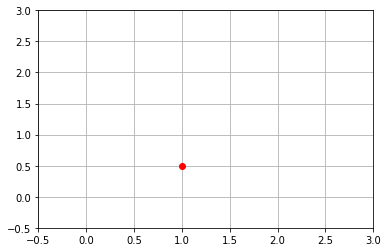

In [514]:
solver.iterate()
plot_pts = solver.pts
plot_pts = np.append(plot_pts,solver.pts[:,0].reshape(r.n,1),axis=1)
plt.plot(plot_pts[0,:],plot_pts[1,:])
plt.plot(r.min[0],r.min[1],marker='o',color='red')
axes = plt.gca()
axes.set_ylim([-.5,3])
axes.set_xlim([-.5,3])
plt.grid()

In [434]:
solver.pts

array([[0.41003034, 0.38641739, 0.38455166],
       [0.89611579, 0.90319095, 0.90891962]])

In [453]:
r.cost(np.array([.399,.899]))

7.39300249999939e-05

In [448]:
r.cost(np.array([.4,.899]))

3.81276089999956e-05

In [478]:
r.grad(np.array([1,.5]))

array([0., 0.])